# Titanic Data Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pd.set_option('display.float_format',lambda x: '%.2f' % x)

### Reading Data

In [3]:
data=pd.read_csv('TitanicData.csv')

In [4]:
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.05,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00,0,0,PC 17758,108.90,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50,0,0,SOTON/O.Q. 3101262,7.25,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.05,NaN,S


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.00,418.00,418.00,332.00,418.00,418.00,417.00
mean,1100.50,0.36,2.27,30.27,0.45,0.39,35.63
std,120.81,0.48,0.84,14.18,0.90,0.98,55.91
min,892.00,0.00,1.00,0.17,0.00,0.00,0.00
25%,996.25,0.00,1.00,21.00,0.00,0.00,7.90
50%,1100.50,0.00,3.00,27.00,0.00,0.00,14.45
75%,1204.75,1.00,3.00,39.00,1.00,0.00,31.50
max,1309.00,1.00,3.00,76.00,8.00,9.00,512.33


### Checking null entries

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
data.isna().any(axis= 0)

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [8]:
Nan_age=data[data['Age'].isna()]

In [9]:
Nan_age

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,0,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.90,NaN,S
22,914,1,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.68,NaN,S
29,921,0,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.68,NaN,C
33,925,1,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
36,928,1,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,1,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.72,NaN,Q
410,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.75,NaN,Q
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.05,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.05,NaN,S


In [10]:
Nan_rows_Cabin=Nan_age[Nan_age['Cabin'].notna()]
Nan_rows_Cabin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
41,933,0,1,"Franklin, Mr. Thomas Parham",male,NaN,0,0,113778,26.55,D34,S
146,1038,0,1,"Hilliard, Mr. Herbert Henry",male,NaN,0,0,17463,51.86,E46,S
288,1180,0,3,"Mardirosian, Mr. Sarkis",male,NaN,0,0,2655,7.23,F E46,C
301,1193,0,2,"Malachard, Mr. Noel",male,NaN,0,0,237735,15.05,D,C


In [11]:
nan_cabin=data[data['Cabin'].isna()]
nan_cabin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.00,0,0,347086,7.78,NaN,S
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.05,NaN,S
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50,0,0,SOTON/O.Q. 3101262,7.25,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.05,NaN,S


In [12]:
Nan_fare=data[data['Fare'].isna()]
Nan_fare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,0,3,"Storey, Mr. Thomas",male,60.50,0,0,3701,NaN,NaN,S


In [13]:
# 82 passengers whose both age and cabin entry are missing
# 1 passenger's fare is not avbl
# 4 passengers whose age is missing but cabin avbl
# while 327 passenger's cabin data is not avbl

In [14]:
Nan_age.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,86.00,86.00,86.00,0.00,86.00,86.00,86.00
mean,1102.19,0.29,2.73,NaN,0.31,0.37,15.02
std,113.63,0.46,0.64,NaN,0.97,1.47,14.18
min,902.00,0.00,1.00,NaN,0.00,0.00,0.00
25%,1004.25,0.00,3.00,NaN,0.00,0.00,7.75
50%,1105.50,0.00,3.00,NaN,0.00,0.00,7.97
75%,1181.75,1.00,3.00,NaN,0.00,0.00,15.56
max,1309.00,1.00,3.00,NaN,8.00,9.00,69.55


In [15]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.00,418.00,418.00,332.00,418.00,418.00,417.00
mean,1100.50,0.36,2.27,30.27,0.45,0.39,35.63
std,120.81,0.48,0.84,14.18,0.90,0.98,55.91
min,892.00,0.00,1.00,0.17,0.00,0.00,0.00
25%,996.25,0.00,1.00,21.00,0.00,0.00,7.90
50%,1100.50,0.00,3.00,27.00,0.00,0.00,14.45
75%,1204.75,1.00,3.00,39.00,1.00,0.00,31.50
max,1309.00,1.00,3.00,76.00,8.00,9.00,512.33


>whose age is missing their survival is lower and also they are from relatively lower Pclass (also lower fare payer)
Or we can say that we have better data of people from high class

In [17]:
femaleD=data[data['Sex'].str.contains('female')]
femaleD.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             25
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          108
Embarked         0
dtype: int64

>Out of 86 passengers only 25 female  age data is missing i.e., there is more discrepency in male age data

### Age vs Survived
Finding if there is any relation of survival of people with their age..

In [19]:
ageS=data.loc[:,['Age','Survived']]
ageS

,Age,Survived
0,34.50,0
1,47.00,1
2,62.00,0
3,27.00,0
4,22.00,1
...,...,...
413,NaN,0
414,39.00,1
415,38.50,0
416,NaN,0


In [20]:
surviveVSage=ageS[ageS['Survived']==1]
surviveVSage

,Age,Survived
1,47.00,1
4,22.00,1
6,30.00,1
8,18.00,1
12,23.00,1
...,...,...
409,3.00,1
410,NaN,1
411,37.00,1
412,28.00,1


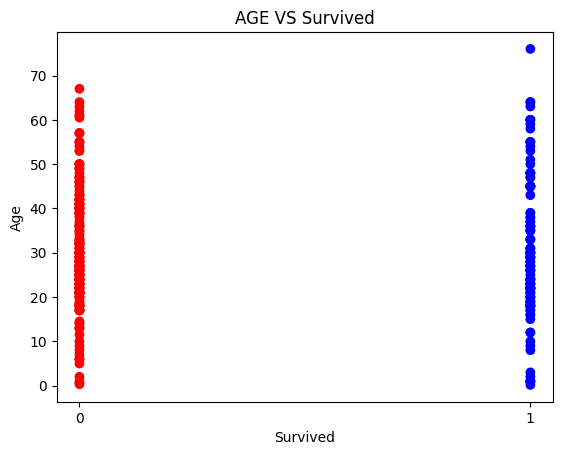

In [21]:
colors = ['red' if x == 0 else 'blue' for x in ageS['Survived']]
plt.scatter(ageS['Survived'], ageS['Age'], color=colors, marker='o')
plt.xticks([0, 1])
plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('AGE VS Survived')
plt.show()

In [22]:
didnotSur=ageS[ageS['Survived']==0]
surviveVSage.describe()

,Age,Survived
count,127.00,152.00
mean,30.27,1.00
std,15.43,0.00
min,0.17,1.00
25%,20.50,1.00
50%,27.00,1.00
75%,38.50,1.00
max,76.00,1.00


In [23]:
didnotSur.describe()

,Age,Survived
count,205.00,266.00
mean,30.27,0.00
std,13.39,0.00
min,0.33,0.00
25%,22.00,0.00
50%,27.00,0.00
75%,40.00,0.00
max,67.00,0.00


>It is notable that the average age of both survived and not survived passengers are almost same and close to 30.27

In [25]:
data2 = data.copy()

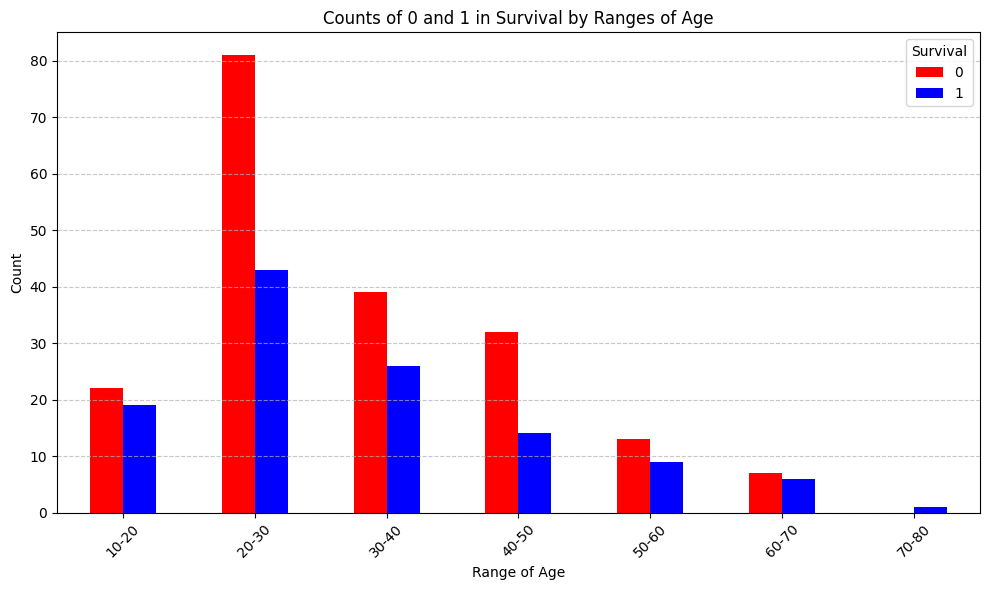

In [26]:

bins = range(10, 90, 10)  # 10-20, 20-30, 30-40, ..., 60-70
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins) - 1)]
data2['Range'] = pd.cut(data2['Age'], bins=bins, labels=labels, right=False)

# Group and count occurrences of 0 and 1 in each range
grouped = data2.groupby(['Range', 'Survived'],observed=False).size().unstack(fill_value=0)

# Plotting
grouped.plot(kind='bar', figsize=(10, 6), color=['red', 'blue'])

# Customizing the plot
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.title('Counts of 0 and 1 in Survival by Ranges of Age')
plt.xticks(rotation=45)
plt.legend(title='Survival', labels=['0', '1'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

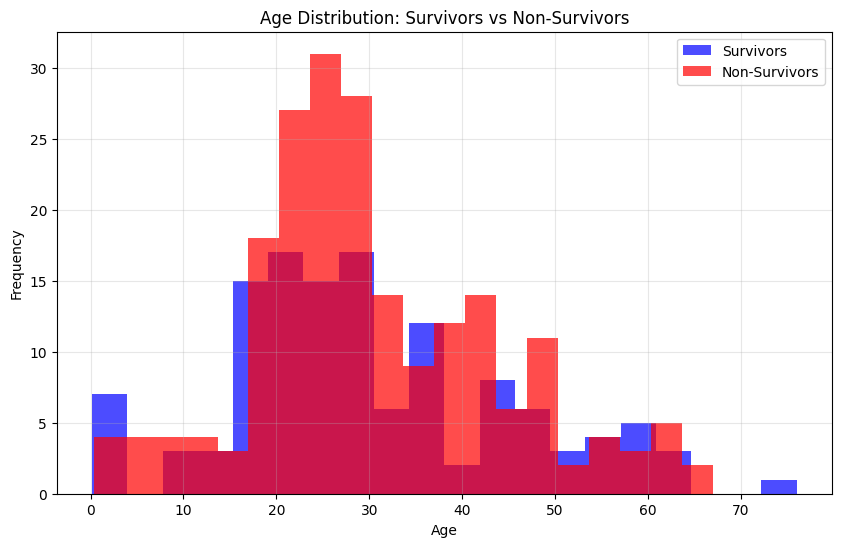

In [27]:
survivors = data[data['Survived'] == 1]  # Data for survivors
non_survivors = data[data['Survived'] == 0] 
plt.figure(figsize=(10, 6))

# Plot for survivors
plt.hist(survivors['Age'].dropna(), bins=20, alpha=0.7, label='Survivors', color='blue')

# Plot for non-survivors
plt.hist(non_survivors['Age'].dropna(), bins=20, alpha=0.7, label='Non-Survivors', color='red')

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution: Survivors vs Non-Survivors')
plt.legend()
plt.grid(alpha=0.3)

# Show plot
plt.show()


In [28]:
# Survival of Young people(10-20) and Aged people(50+) seems to be more than the middle aged people 
# It could be that safety of old age and children was priortized

In [29]:
data3=data[['Survived','Sex','Age','SibSp','Parch','Fare','Pclass']]
data3.groupby('Sex').sum()

,Survived,Age,SibSp,Parch,Fare,Pclass
Sex,,,,,,
female,152,3844.59,86,91,7561.65,326
male,0,6205.91,101,73,7294.89,621


In [30]:
data3.groupby('Sex').mean()

,Survived,Age,SibSp,Parch,Fare,Pclass
Sex,,,,,,
female,1.00,30.27,0.57,0.60,49.75,2.14
male,0.00,30.27,0.38,0.27,27.53,2.33


It is clear that female were first rescued and **100% female passengers survived**
While no male passenger survived! (possiblity of error in data)
Also Female paid significantly greater fare than male
While there seems no factor of age as avg age seems similar

### Survival VS PassengerClass

In [32]:
data4=data3.drop(columns='Sex')
data4.groupby('Pclass').mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.47,40.92,0.48,0.38,94.28
2,0.32,28.78,0.38,0.34,22.20
3,0.33,24.03,0.46,0.42,12.46


>Clearly survival of higher class passenger was more
also it can be noted that their average age is more rather more younger people travelled from lower class which is obv
as they might not be able to afford higher class.

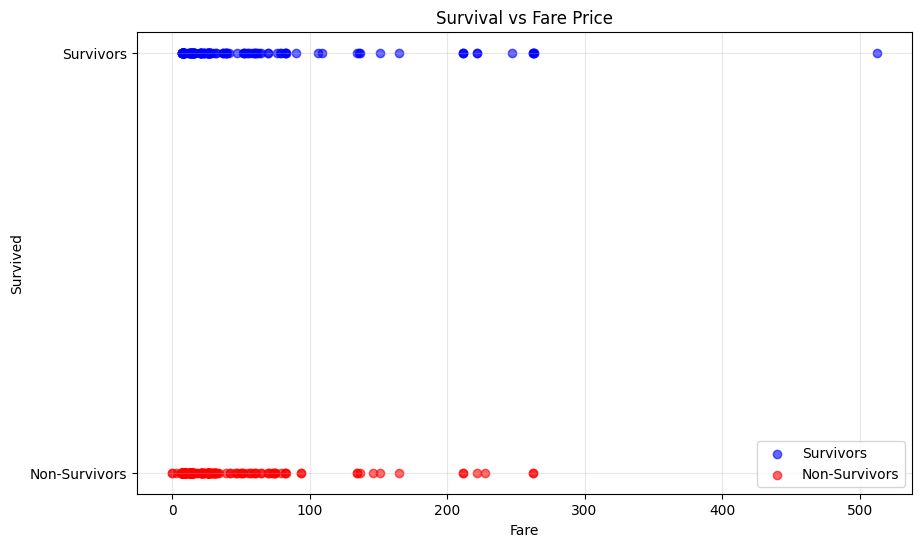

In [34]:
# Separate survivors and non-survivors
survivors = data[data['Survived'] == 1]
non_survivors = data[data['Survived'] == 0]

# Plot the scatter plot
plt.figure(figsize=(10, 6))

# Plot for survivors
plt.scatter(survivors['Fare'], [1] * len(survivors), color='blue', alpha=0.6, label='Survivors')

# Plot for non-survivors
plt.scatter(non_survivors['Fare'], [0] * len(non_survivors), color='red', alpha=0.6, label='Non-Survivors')

# Add labels and title
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.title('Survival vs Fare Price')
plt.yticks([0, 1], ['Non-Survivors', 'Survivors'])  # Custom ticks for y-axis
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()


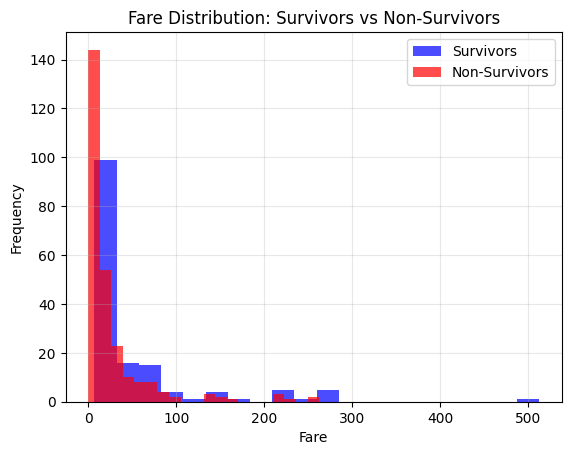

In [35]:
survivors = data[data['Survived'] == 1]
non_survivors = data[data['Survived'] == 0]
# Plot for survivors
plt.hist(survivors['Fare'].dropna(), bins=20, alpha=0.7, label='Survivors', color='blue')

# Plot for non-survivors
plt.hist(non_survivors['Fare'].dropna(), bins=20, alpha=0.7, label='Non-Survivors', color='red')

# Add labels and legend
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Distribution: Survivors vs Non-Survivors')
plt.legend()
plt.grid(alpha=0.3)

# Show plot
plt.show()


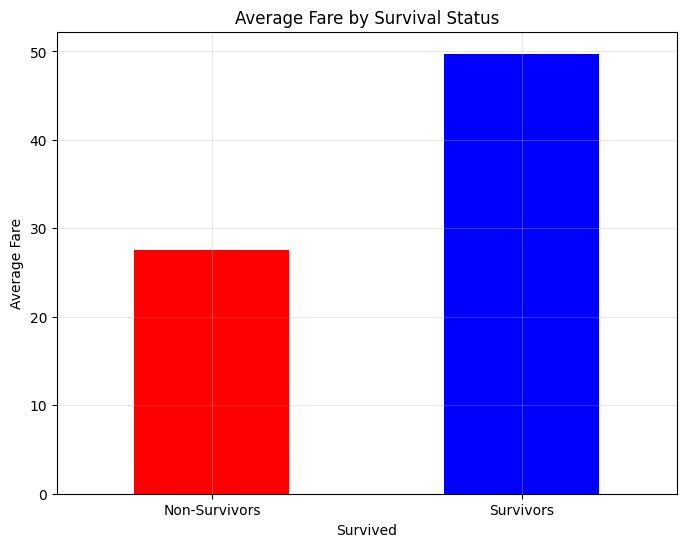

In [36]:
# Calculate mean fare by survival status
mean_fare = data.groupby('Survived')['Fare'].mean()

# Plot a bar chart
mean_fare.plot(kind='bar', color=['red', 'blue'], figsize=(8, 6))
plt.title('Average Fare by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Average Fare')
plt.xticks([0, 1], ['Non-Survivors', 'Survivors'], rotation=0)  # Custom x-axis labels
plt.grid(alpha=0.3)

# Show the plot
plt.show()


>Passengers who paid higher payer were clearly evacuated first and given priority.

In [38]:
data5= data.sort_values(by='SibSp',ascending=False)
data5.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
188,1080,1,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S
360,1252,0,3,"Sage, Master. William Henry",male,14.50,8,2,CA. 2343,69.55,NaN,S
140,1032,1,3,"Goodwin, Miss. Jessie Allis",female,10.00,5,2,CA 2144,46.90,NaN,S
214,1106,1,3,"Andersson, Miss. Ida Augusta Margareta",female,38.00,4,2,347091,7.78,NaN,S
379,1271,0,3,"Asplund, Master. Carl Edgar",male,5.00,4,2,347077,31.39,NaN,S
55,947,0,3,"Rice, Master. Albert",male,10.00,4,1,382652,29.12,NaN,Q
154,1046,0,3,"Asplund, Master. Filip Oscar",male,13.00,4,2,347077,31.39,NaN,S
389,1281,0,3,"Palsson, Master. Paul Folke",male,6.00,3,1,349909,21.07,NaN,S
394,1286,0,3,"Kink-Heilmann, Mr. Anton",male,29.00,3,1,315153,22.02,NaN,S
53,945,1,1,"Fortune, Miss. Ethel Flora",female,28.00,3,2,19950,263.00,C23 C25 C27,S


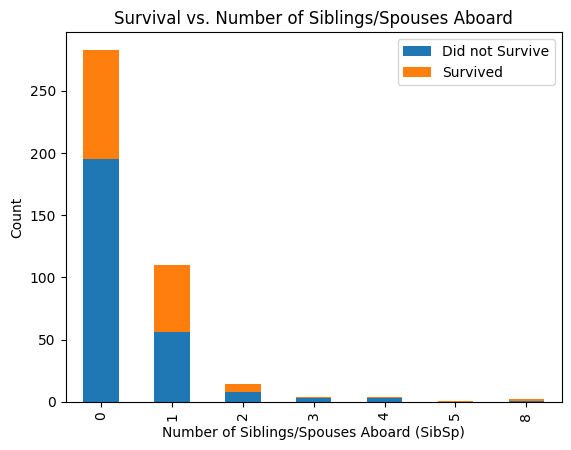

In [39]:

survival_sibsp = data5.groupby(['SibSp', 'Survived']).size().unstack(fill_value=0)

# Plot the data
survival_sibsp.plot(kind='bar', stacked=True)
plt.xlabel('Number of Siblings/Spouses Aboard (SibSp)')
plt.ylabel('Count')
plt.title('Survival vs. Number of Siblings/Spouses Aboard')
plt.legend(['Did not Survive', 'Survived'])
plt.show()


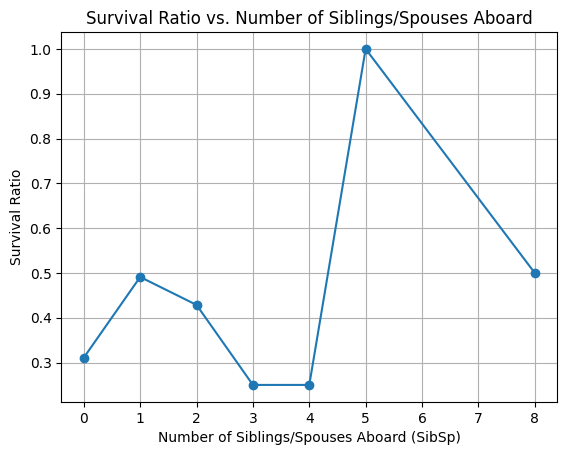

In [40]:

survivalratio_sibsp = data5.groupby('SibSp')['Survived'].mean()

# Plot the data
plt.plot(survivalratio_sibsp.index, survivalratio_sibsp.values, marker='o', linestyle='-')
plt.xlabel('Number of Siblings/Spouses Aboard (SibSp)')
plt.ylabel('Survival Ratio')
plt.title('Survival Ratio vs. Number of Siblings/Spouses Aboard')
plt.grid(True)
plt.show()


In [41]:
data.groupby('SibSp').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Ticket,Fare,Cabin,Embarked
SibSp,,,,,,,,,,,
0,283,283,283,283,283,214,283,283,282,45,283
1,110,110,110,110,110,97,110,110,110,41,110
2,14,14,14,14,14,11,14,14,14,4,14
3,4,4,4,4,4,4,4,4,4,1,4
4,4,4,4,4,4,4,4,4,4,0,4
5,1,1,1,1,1,1,1,1,1,0,1
8,2,2,2,2,2,1,2,2,2,0,2


well this is due to very smaller sample size of 2-8 SibSp as majority of passenger's sibsp is 0 or 1
if we compare people with  0 and 1 SiblingSpouse then it says people who were in pair had a better survival rate

In [43]:
data5= data.sort_values(by='Parch',ascending=False)
data5.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
342,1234,0,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S
365,1257,1,3,"Sage, Mrs. John (Annie Bullen)",female,NaN,1,9,CA. 2343,69.55,NaN,S
139,1031,0,3,"Goodwin, Mr. Charles Frederick",male,40.00,1,6,CA 2144,46.90,NaN,S
174,1066,0,3,"Asplund, Mr. Carl Oscar Vilhelm Gustafsson",male,40.00,1,5,347077,31.39,NaN,S
132,1024,1,3,"Lefebre, Mrs. Frank (Frances)",female,NaN,0,4,4133,25.47,NaN,S
69,961,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.00,1,4,19950,263.00,C23 C25 C27,S
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.00,1,3,PC 17608,262.38,B57 B59 B63 B66,C
142,1034,0,1,"Ryerson, Mr. Arthur Larned",male,61.00,1,3,PC 17608,262.38,B57 B59 B63 B66,C
178,1070,1,2,"Becker, Mrs. Allen Oliver (Nellie E Baumgardner)",female,36.00,0,3,230136,39.00,F4,S
330,1222,1,2,"Davies, Mrs. John Morgan (Elizabeth Agnes Mary...",female,48.00,0,2,C.A. 33112,36.75,NaN,S


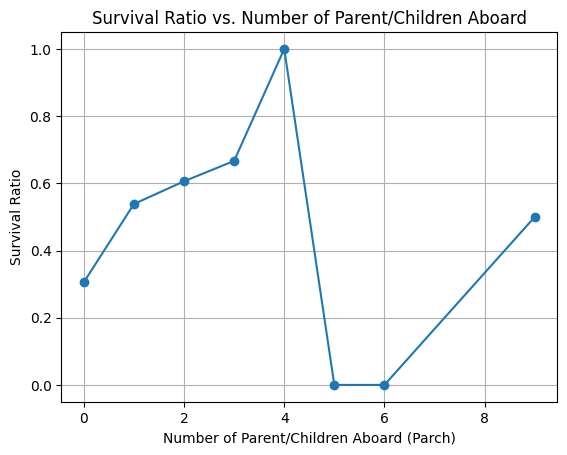

In [44]:
survivalratio_parch = data5.groupby('Parch')['Survived'].mean()

# Plot the data
plt.plot(survivalratio_parch.index, survivalratio_parch.values, marker='o', linestyle='-')
plt.xlabel('Number of Parent/Children Aboard (Parch)')
plt.ylabel('Survival Ratio')
plt.title('Survival Ratio vs. Number of Parent/Children Aboard')
plt.grid(True)
plt.show()

In [45]:
data.groupby('Parch').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked
Parch,,,,,,,,,,,
0,324,324,324,324,324,247,324,324,323,64,324
1,52,52,52,52,52,50,52,52,52,17,52
2,33,33,33,33,33,29,33,33,33,6,33
3,3,3,3,3,3,3,3,3,3,3,3
4,2,2,2,2,2,1,2,2,2,1,2
5,1,1,1,1,1,1,1,1,1,0,1
6,1,1,1,1,1,1,1,1,1,0,1
9,2,2,2,2,2,0,2,2,2,0,2


In [53]:
data5['FamilySize'] = data['SibSp']+ data['Parch']
data5.groupby('FamilySize').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
FamilySize,,,,,,,,,,,,
0,253,253,253,253,253,186,253,253,253,252,37,253
1,74,74,74,74,74,67,74,74,74,74,30,74
2,57,57,57,57,57,51,57,57,57,57,15,57
3,14,14,14,14,14,12,14,14,14,14,4,14
4,7,7,7,7,7,6,7,7,7,7,3,7
5,3,3,3,3,3,3,3,3,3,3,2,3
6,4,4,4,4,4,4,4,4,4,4,0,4
7,2,2,2,2,2,2,2,2,2,2,0,2
10,4,4,4,4,4,1,4,4,4,4,0,4


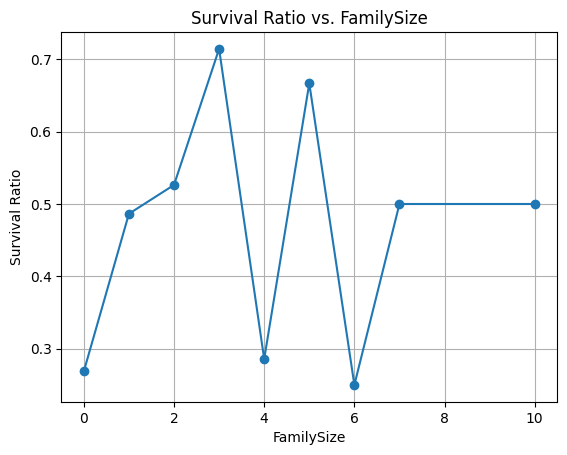

In [54]:
survivalratio_FamilySize = data5.groupby('FamilySize')['Survived'].mean()

# Plot the data
plt.plot(survivalratio_FamilySize.index, survivalratio_FamilySize.values, marker='o', linestyle='-')
plt.xlabel('FamilySize')
plt.ylabel('Survival Ratio')
plt.title('Survival Ratio vs. FamilySize')
plt.grid(True)
plt.show()

Similar is the case with FamilySize data... if we compare with 0,1,2 and 3 family size then,
It can be seen that **bigger the family size better chance of survival.**

In [67]:
data7=data[data['Embarked']=='S']
data8=data[data['Embarked']=='C']
data9=data[data['Embarked']=='Q']
data7.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family Size,FamilySize
count,270.00,270.00,270.00,228.00,270.00,270.00,269.00,270.00,270.00
mean,1104.79,0.33,2.34,28.76,0.50,0.46,28.23,0.96,0.96
std,118.42,0.47,0.77,13.83,1.02,1.13,39.90,1.74,1.74
min,893.00,0.00,1.00,0.17,0.00,0.00,0.00,0.00,0.00
25%,1009.50,0.00,2.00,21.00,0.00,0.00,8.05,0.00,0.00
50%,1105.50,0.00,3.00,26.00,0.00,0.00,13.78,0.00,0.00
75%,1207.75,1.00,3.00,36.00,1.00,0.00,26.55,1.00,1.00
max,1308.00,1.00,3.00,76.00,8.00,9.00,263.00,10.00,10.00


In [68]:
data8.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family Size,FamilySize
count,102.00,102.00,102.00,82.00,102.00,102.00,102.00,102.00,102.00
mean,1094.68,0.39,1.79,34.74,0.42,0.38,66.26,0.80,0.80
std,123.17,0.49,0.93,14.75,0.55,0.69,84.90,0.98,0.98
min,900.00,0.00,1.00,1.00,0.00,0.00,6.44,0.00,0.00
25%,987.50,0.00,1.00,24.00,0.00,0.00,13.86,0.00,0.00
50%,1095.50,0.00,1.00,35.00,0.00,0.00,27.72,1.00,1.00
75%,1205.25,1.00,3.00,45.75,1.00,1.00,78.47,1.00,1.00
max,1309.00,1.00,3.00,64.00,2.00,3.00,512.33,4.00,4.00


In [69]:
data9.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family Size,FamilySize
count,46.00,46.00,46.00,22.00,46.00,46.00,46.00,46.00,46.00
mean,1088.24,0.52,2.87,29.32,0.20,0.02,10.96,0.22,0.22
std,130.50,0.51,0.40,12.63,0.69,0.15,12.62,0.81,0.81
min,892.00,0.00,1.00,10.00,0.00,0.00,6.95,0.00,0.00
25%,978.50,0.00,3.00,21.25,0.00,0.00,7.75,0.00,0.00
50%,1080.00,1.00,3.00,26.50,0.00,0.00,7.75,0.00,0.00
75%,1192.75,1.00,3.00,34.88,0.00,0.00,7.88,0.00,0.00
max,1303.00,1.00,3.00,62.00,4.00,1.00,90.00,5.00,5.00


>This is **very interesting to note** that Although the Avg Fare paid by people boarding from *Queensland* is significantly lower
than other two ports and also avg class is also lower and even their family size is least yet their survival rate
is much greater than people boarding from *Cherbourg*.
